<font size="7">**Introduction**</font>

Our goal for this project was to find the best neighborhood in Pittsburgh for athletes. This would also allow us to see if Pittsburgh had an adequate amount of facilities and fields for athletes to get proper training. To do this, we chose three data sets that we determined to be the best fit to find the best neighborhood. Those datasets were recreational centers, playing fields and courts and rinks. We also looked at a purely pools dataset, but thought that recreational centers would be a better choice, as pools would also be included in it. 

<font size="7">**Metric 1: Rec Centers**</font>

<font size="3">**Dean Assicurato**</font>

Recreation centers are hubs for athletes and athletic activity in communities. This metric is incredibly important for finding which neighborhood is best suited for atheletes. We chose to make pools and recreation centers fall under the same category because most of the recreation centers were called "pool/rec centers" in the data set. This approach ensures a comprehensive assessment of athletic amenities across neighborhoods.

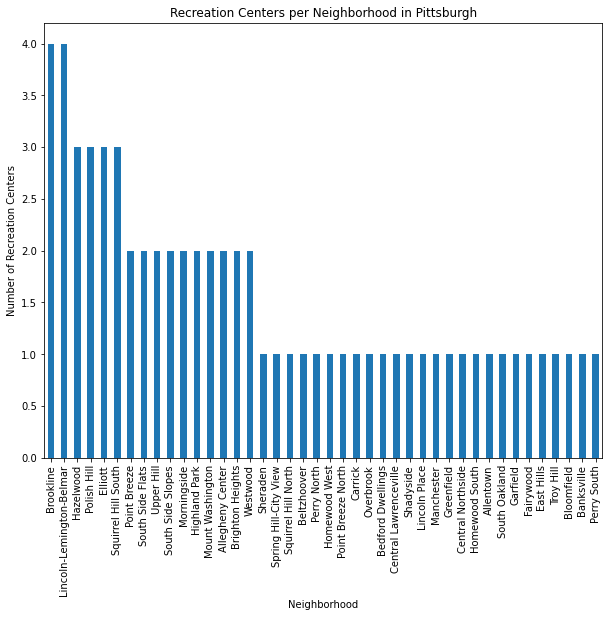

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('rec-center.csv')

keywords= ['Pool', 'Rec Center', 'Recreation Center','Recreation', 'Rec', 'Community', 'Activity']

filteredDf= df[df['type'].str.contains('|'.join(keywords), case=False, na=False)]

count= filteredDf['neighborhood'].value_counts()

plt.figure(figsize=(10, 8))
count.plot(kind= 'bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Recreation Centers')
plt.title('Recreation Centers per Neighborhood in Pittsburgh')
plt.show()

This is a bar graph of Recreation Centers in their respective Pittsburgh neighborhoods. This metric was a bit trickier to do because the original CSV file included many different types of municipality buildings. In order to sort through this unwanted data and create the bar graph seen above, I used a list of keywords to narrow down the search. Lincoln-Lemington-Belmar and Brookline are our two front runners.

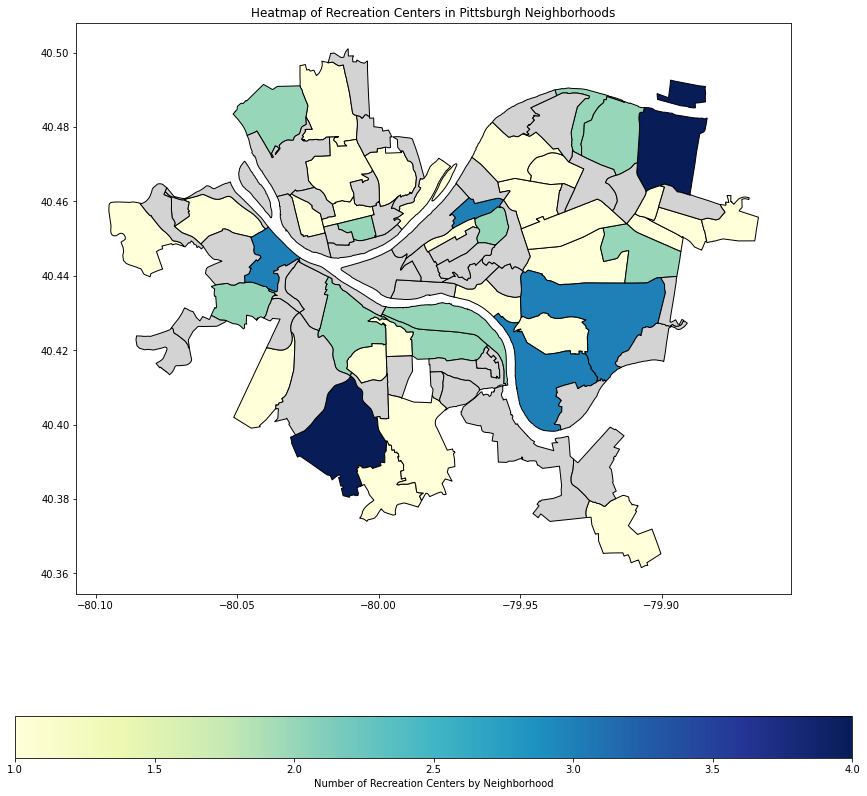

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

mapOfPittsburgh= gpd.read_file('Neighborhoods_.shp')

df= pd.read_csv('rec-center.csv')

keywords_list =['Pool', 'Rec Center', 'Recreation Center','Recreation', 'Rec', 'Community', 'Activity']

filteredDf= df[df['type'].str.contains('|'.join(keywords_list), case=False, na=False)]

count= filteredDf['neighborhood'].value_counts().reset_index()
count.columns = ['Neighborhood', 'Count']

merge= mapOfPittsburgh.merge(count,left_on='hood',right_on='Neighborhood', how='left')

fig,plot_area= plt.subplots(figsize=(15, 15))
merge.plot(column='Count',ax=plot_area, legend=True, cmap='YlGnBu', edgecolor='black',
                          legend_kwds={'label': "Number of Recreation Centers by Neighborhood", 'orientation': "horizontal"}, missing_kwds={'color': "lightgrey"})

plt.title('Heatmap of Recreation Centers in Pittsburgh Neighborhoods')
plt.show()

his heatmap helps shows exactly where the neighborhoods of interest are located. As you move to the right towards dark blue on the color gradient, a higher concentration of courts and rinks can be seen. In this map, there are a lot of neighborhoods that do not even have 1 recreation center, making them automatically unfit for selection. Lincoln-Lemington-Belmar and Brookline stand out as front-runners for this category.

<font size="3">**Conclusion**</font>

Based on the bar graph and heatmap, we believe that Lincoln-Lemington-Belmar or Brookline is the optimal choice for athletes. While there are multiple other neighborhoods that come close to reaching the same caliber as these two, none quite reach the same quantity of recreation centers.

<font size="7">**Metric 2: Playing Fields**</font>

<font size="3">**Logan Keebler**</font>

Metric: Playing Fields

I chose this metric as having fields to play on is necessary for an athlete. If there is nowhere for the athlete to practice, then how can they train properly. Thus I figured this is an extremely important attribute a neighborhood should have if it is to be considered the best neighborhood in Pittsburgh.

Importing pandas and other necessary imports

In [13]:
import pandas as panda
import geopandas
%matplotlib inline
import matplotlib.pyplot as plot

dataFrame = panda.read_csv("PlayingFields.csv")
dataFrame.head(5)

,_id,id,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1,2,1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
2,3,971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
3,4,1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
4,5,1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,...,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870


Here is the raw data from the playing fields dataset. The actual dataset contains 114 different parks, I've only printed the first 5 to show what information is in the table. 


Text(0, 0.5, '# of Fields')

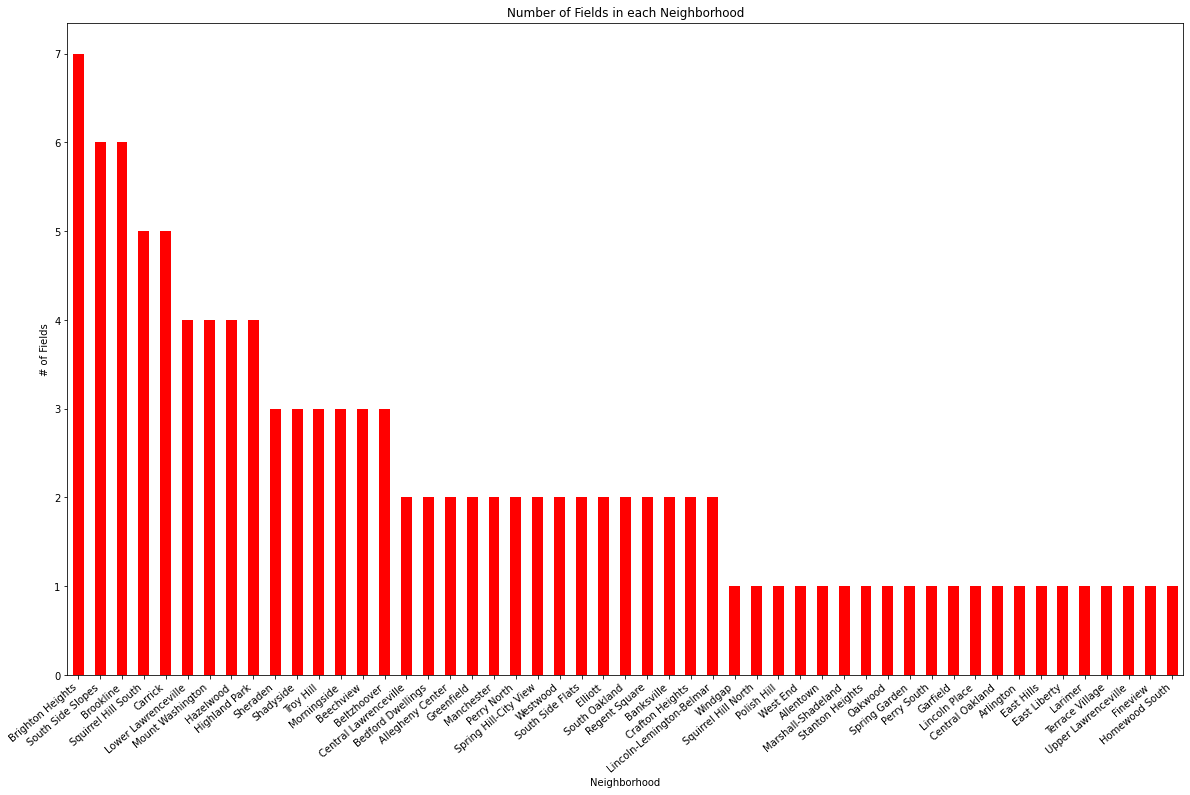

In [6]:
fieldsCount =dataFrame["neighborhood"].value_counts()
plot.figure(figsize=(20,12))
fieldsCount.plot(kind='bar', color =['red'])
plot.title("Number of Fields in each Neighborhood")
plot.xlabel("Neighborhood")
plot.xticks(rotation = 40, ha = "right")
plot.ylabel("# of Fields")

Here is a bar graph of each neighborhood, representing how many fields are located in each neighborhood.

Text(0, 0.5, '# of Fields')

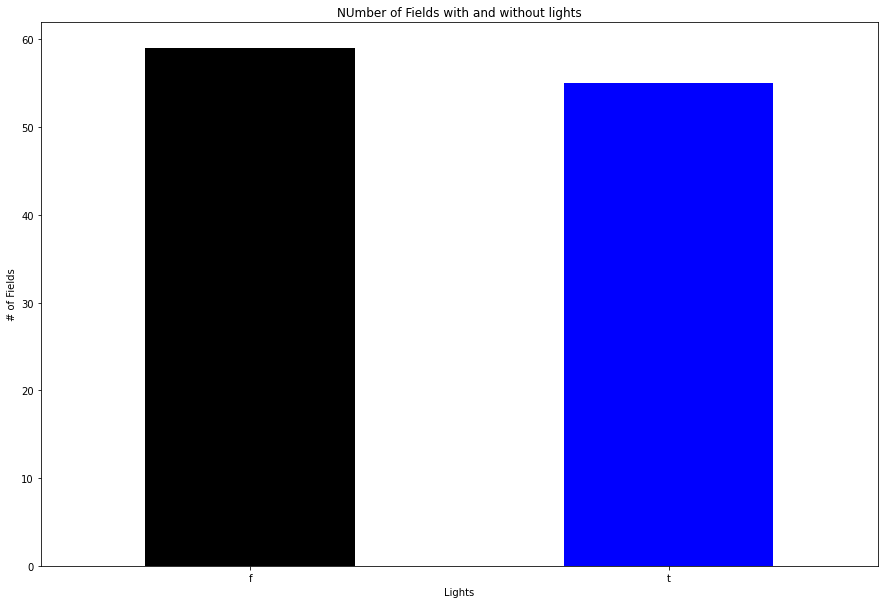

In [7]:
lightCounts = dataFrame['has_lights'].value_counts()
plot.figure(figsize=(15,10))
lightCounts.plot(kind='bar', color=['black', 'blue'])
plot.title("NUmber of Fields with and without lights")
plot.xlabel("Lights")
plot.xticks(rotation = 0)
plot.ylabel("# of Fields")

Here is a further distribution of the specific details of the fields, being whether or not the fields have lights or not. I figured this was an important data point to consider as having lights would be better for athletes, as they can more adequately play. 

In [8]:
fieldsCount = dataFrame["neighborhood"].value_counts().reset_index()
fieldsCount.columns = ['neighborhood', 'fields_count']
lightsCounts = dataFrame.groupby('neighborhood')['has_lights'].apply(lambda x: x.map({'t': 1, 'f': 0}).sum()).reset_index()
lightsCounts.columns = ['neighborhood', 'fields_with_lights']
mergedDF = panda.merge(fieldsCount, lightsCounts, on = 'neighborhood', how = 'left')
mergedDF['fields_with_lights'] = mergedDF['fields_with_lights'].fillna(0).astype(int)
mergedDF['sum_of_fields'] = mergedDF['fields_count'] + mergedDF['fields_with_lights']
mergedDF.drop(['fields_count', 'fields_with_lights'], axis=1, inplace=True)
sortedDF = mergedDF.sort_values(by= 'sum_of_fields', ascending = False)
mergedDF

,neighborhood,sum_of_fields
0,Brighton Heights,7
1,South Side Slopes,10
2,Brookline,9
3,Squirrel Hill South,7
4,Carrick,8
5,Lower Lawrenceville,6
6,Mount Washington,8
7,Hazelwood,5
8,Highland Park,4
9,Sheraden,4


Here is the merged data of our ranking system for all the neighborhoods in Pittsburgh

In [9]:
sortedDF.head(15)

,neighborhood,sum_of_fields
1,South Side Slopes,10
2,Brookline,9
4,Carrick,8
6,Mount Washington,8
0,Brighton Heights,7
3,Squirrel Hill South,7
12,Morningside,6
11,Troy Hill,6
5,Lower Lawrenceville,6
7,Hazelwood,5


Above is the sorted data, which ranks all the neighborhoods in order based upon how many baseball fields they have and the quality of them (lights or not). 

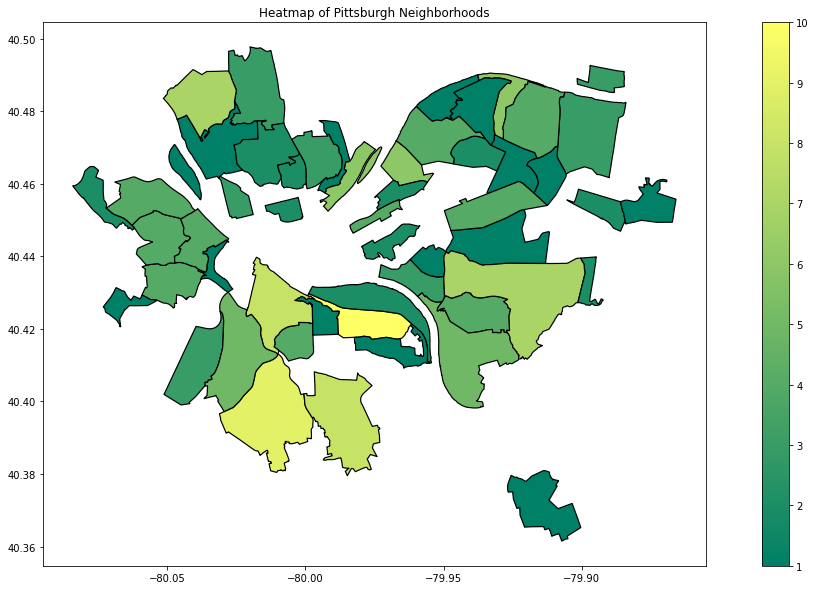

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
geoDF = panda.merge(neighborhoods, sortedDF, left_on='hood', right_on='neighborhood', how='left')
fig, ax = plot.subplots(figsize=(20, 10))
geoDF.plot(column='sum_of_fields', cmap='summer', linewidth=1.2, ax=ax, edgecolor='black', legend=True)
plot.title('Heatmap of Pittsburgh Neighborhoods')
plot.show()

The heatmap represents how the ranking system of playing fields in each neighborhood in Pittsburgh. As the colors get more yellower, their quality and quantity increases. 

<font size="3">**Conclusion**</font>

Thus I personally reached my conclusion from this dataset that South Side Slopes is the best neighborhood for athletes in Pittsburgh. It is just standalone in its point system at 10, above any others, that I had to choose it based upon this specific metric. Brookline shouts also dserves a shout though, as it recieved a score of 9. I haven't lived in the Pittsburgh area for long, so I can't confirm this from my own experience.

<font size="7">**Metric 3: Courts and Rinks**</font>

<font size="3">**Dean Assicurato**</font>

I chose "Courts and Rinks" as my metric in order to find which neighborhood in Pittsburgh is the best suited for athletes. This data set includes all the basketball courts, tennis courts, ice rinks and roller rinks that are available in each one. We believe that a neighborhood containing a higher count of courts and rinks is considered to be of a higher value then one with a lower count.

<font size="3">**Data**</font>

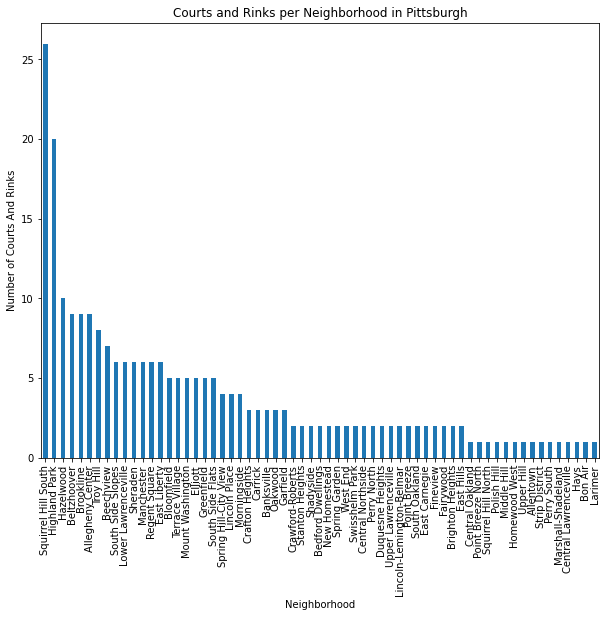

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('courtsandrinks.csv')

count = df['neighborhood'].value_counts()

plt.figure(figsize=(10, 8))
count.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Courts And Rinks')
plt.title('Courts and Rinks per Neighborhood in Pittsburgh')
plt.show()

This bar graph makes it very easy to visualize the distribution of courts and rinks in each neighborhood. It is clear that Squirrel Hill South and Highland Park have the most, making them both good choices for our selection.

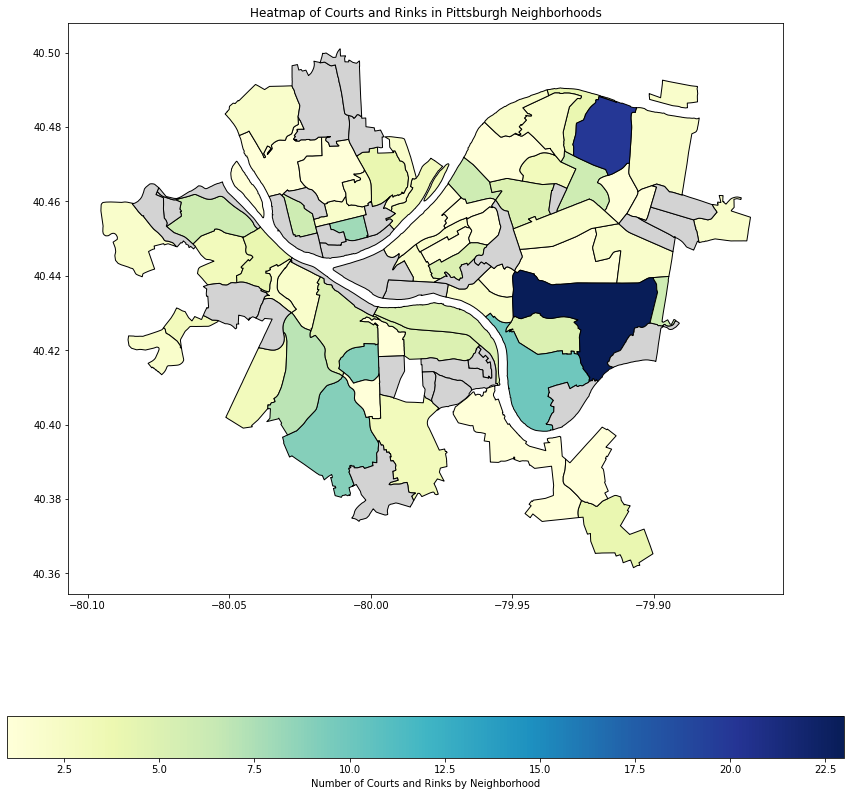

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

mapOfPittsburgh= gpd.read_file('Neighborhoods_.shp')

df= pd.read_csv('courtsandrinks.csv')

active=df[df['inactive'] == 'f']

count= active['neighborhood'].value_counts().reset_index()
count.columns= ['Neighborhood', 'Count']

merge= mapOfPittsburgh.merge(count, left_on='hood', right_on='Neighborhood', how='left')

fig,ax= plt.subplots(1,1,figsize=(15,15))

merge.plot(column='Count',ax=ax,legend=True, cmap='YlGnBu',edgecolor="black",
           legend_kwds={'label': "Number of Courts and Rinks by Neighborhood",
                        'orientation': "horizontal"},missing_kwds={"color": "lightgrey"})

plt.title('Heatmap of Courts and Rinks in Pittsburgh Neighborhoods')
plt.show()

This heatmap helps shows exactly where the neighborhoods of interest are located. As you move to the right towards dark blue on the color gradient, a higher concentration of courts and rinks can be seen. It is very evident from this map that Squirrel Hill South and Highland Park stand out amongst the others.

<font size = "3">**Conclusion**</font>

Based on this data, two clear neighborhoods emerge. Squirrel Hill South and Highland Park. I think that either one of these make great choices for athletes, but in my opinion, Squirrel Hill South narrowly comes out on top. It has a staggering 25+ different rinks and courts, making it perfect any type of athletic activity.

<font size="7">**The Best Neighborhood?**</font>

Through our three data sets, we decided that the best neighborhood for athletes in Pittsburgh was Brookline. It was the runner up in two of the metrics, and its solid ranking in all three metrics lead us to believe it is the best neighborhood we found by data driven evidence. 

<font size="7">**Conclusion**</font>

At the end of all our data analysis, we concluded that Brookline is the best neighborhood for athletes in Pittsburgh. It is just consistent all around in all three metrics, allowing for a multitude of different athletes to emerge from the neighborhood. 

Logan - My personal favorite neighborhood would be Squirrel Hill South as it has the most rinks and courts of any of the neighborhoods. Basketball is one of my favorite sports to play, and having a multitude of different courts would be great to play pick up. It would also allow me to explore the Pittsburgh area, as I haven't seen much of it besides Oakland and Shadyside.

Dean - I think I would enjoy South Side Slopes the most as my neighborhood. Since it has some of the most and best quality fields, it would fit well for me as I enjoy playing lacrosse. I am on the Pitt lacrosse club team, so being able to practice outside on a nice field would be enjoyable for me. 